# Exercise 4.10 Coding Etiquette & Excel Reporting

# Table of Contents

Part 1

1. Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. 
This should be the merged version of your data that contains the new customers column.

2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

3. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).
Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

4. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Assign Path
path = r'/Users/andrew/Documents/Data Analyst Course/Data Immersion/Achievement 4/Instacart Basket Analysis'

# Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

In [3]:
# Data imported from exercise 4.9
df_prods_ords_customers = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'orders_products_all.pkl'))

In [4]:
# Check headers
df_prods_ords_customers.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,First Name,Surname,Gender,State,Age,date_joined,Dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [5]:
# Check shape
df_prods_ords_customers.shape

(32435059, 33)

# Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

Any data security concerns should be addressed before analysis begins. In this data set we have several columns which could identify a particular person:
 - First Name
 - Surname

In [16]:
# Won't remove these columns, however will create a subset of the data which removes these two columns for rest of analysis
df_prods_ords_customers_2 = df_prods_ords_customers.drop(columns = ['First Name','Surname'])

## The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

In [17]:
# Create Region column based on State

In [18]:
result = []

for value in df_prods_ords_customers_2['State']:
    if (value == "Maine") or (value == "New Hampshire") or (value == "Vermont") or (value ==  "Massachusetts") or (value == "Rhode Island") or (value == "Connecticut") or (value == "New York") or (value == "Pennsylvania") or (value == "New Jersey"):
        result.append('Northeast')
    elif (value == "Wisconsin") or (value == "Michigan") or (value == "Illinois") or (value == "Indiana") or (value == "Ohio") or (value == "North Dakota") or (value == "South Dakota") or (value == "Nebraska") or (value == "Kansas") or (value == "Minnesota") or (value == "Iowa") or (value == "Missouri"):
        result.append('Midwest')
    elif (value == "Delaware") or (value == "Maryland") or (value == "District of Columbia") or (value == "Virginia") or (value == "West Virginia") or (value == "North Carolina") or (value == "South Carolina") or (value == "Georgia") or (value == "Florida") or (value == "Kentucky") or (value == "Tennessee") or (value == "Mississippi") or (value == "Alabama") or (value == "Oklahoma") or (value == "Texas") or (value == "Arkansas") or (value == "Louisiana"):
        result.append('South')
    else:
        result.append('West')

In [19]:
result

['South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'Wes

In [20]:
df_prods_ords_customers_2['Region'] = result

In [10]:
# Check output

In [21]:
df_prods_ords_customers_2.head(100)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,order_frequency,Gender,State,Age,date_joined,Dependants,fam_status,income,_merge,Region
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,738281,2,4,2,10,8.0,False,21150,13,0,...,Regular customer,Female,Alaska,68,7/4/2017,3,married,64940,both,West
96,1673511,2,5,3,11,8.0,False,47144,1,0,...,Regular customer,Female,Alaska,68,7/4/2017,3,married,64940,both,West
97,1673511,2,5,3,11,8.0,False,5322,2,0,...,Regular customer,Female,Alaska,68,7/4/2017,3,married,64940,both,West
98,1673511,2,5,3,11,8.0,False,17224,3,0,...,Regular customer,Female,Alaska,68,7/4/2017,3,married,64940,both,West


In [33]:
pd.options.display.max_columns = None

In [34]:
df_prods_ords_customers_2.head(100)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range,busiest_days,busiest_period_of_day,max_order,loyalty_flag,user_avg_price,spending_habit,median_order_duration,order_frequency,Gender,State,Age,date_joined,Dependants,fam_status,income,_merge,Region
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77.0,7.0,9.0,Mid-range product,Regularly busy,Most orders,10,New customer,6.367797,Lower spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
1,2539329,1,1,2,8,NaN,True,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.5,Mid-range product,Regularly busy,Most orders,10,New customer,6.367797,Lower spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
2,2539329,1,1,2,8,NaN,True,12427,3,0,Original Beef Jerky,23.0,19.0,4.4,Low-range product,Regularly busy,Most orders,10,New customer,6.367797,Lower spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
3,2539329,1,1,2,8,NaN,True,26088,4,0,Aged White Cheddar Popcorn,23.0,19.0,4.7,Low-range product,Regularly busy,Most orders,10,New customer,6.367797,Lower spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
4,2539329,1,1,2,8,NaN,True,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,1.0,Low-range product,Regularly busy,Most orders,10,New customer,6.367797,Lower spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,738281,2,4,2,10,8.0,False,21150,13,0,Fire Grilled Steak Bowl,38.0,1.0,5.9,Mid-range product,Regularly busy,Most orders,14,Regular customer,7.515897,Lower spender,13.0,Regular customer,Female,Alaska,68,7/4/2017,3,married,64940,both,West
96,1673511,2,5,3,11,8.0,False,47144,1,0,Unsweetened Original Almond Breeze Almond Milk,91.0,16.0,14.0,Mid-range product,Least busy,Most orders,14,Regular customer,7.515897,Lower spender,13.0,Regular customer,Female,Alaska,68,7/4/2017,3,married,64940,both,West
97,1673511,2,5,3,11,8.0,False,5322,2,0,Gluten Free Dark Chocolate Chunk Chewy with a ...,3.0,19.0,2.9,Low-range product,Least busy,Most orders,14,Regular customer,7.515897,Lower spender,13.0,Regular customer,Female,Alaska,68,7/4/2017,3,married,64940,both,West
98,1673511,2,5,3,11,8.0,False,17224,3,0,Oats & Honey Gluten Free Granola,3.0,19.0,1.6,Low-range product,Least busy,Most orders,14,Regular customer,7.515897,Lower spender,13.0,Regular customer,Female,Alaska,68,7/4/2017,3,married,64940,both,West


In [22]:
df_prods_ords_customers_2['Region'].value_counts(dropna = False)

South        10801982
West          8300617
Midwest       7604016
Northeast     5728444
Name: Region, dtype: int64

In [ ]:
# Check to see if region count matches total:
# 10801982 + 8300617 + 7604016 + 5728444 = 32435059

In [32]:
df_prods_ords_customers_2.shape

(32435059, 32)

In [ ]:
# Region count matches the total

## Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [13]:
# Check if states spending habits differ

In [23]:
region_crosstab = pd.crosstab(df_prods_ords_customers_2['Region'], df_prods_ords_customers_2['spending_habit'], dropna = False)

In [24]:
region_crosstab

spending_habit,Higher spender,Lower spender
Region,,
Midwest,29299,7574717
Northeast,18645,5709799
South,40628,10761354
West,31275,8269342


In [16]:
# Midwest higher spender % of population  
Midwest = (29299/7604016) * 100

In [17]:
Midwest

0.3853095522155661

In [18]:
# Northeast higher spender & of population 

In [19]:
Northeast = (18645/5728444) * 100

In [20]:
Northeast

0.3254810555885682

In [21]:
# South higher spender % of population 

In [22]:
South = (40628/10801982) * 100

In [23]:
South

0.3761161609045451

In [24]:
# West higher spender % of population 

In [25]:
West = (31275/8300617) * 100

In [26]:
West

0.37677922014712883

In [27]:
All regions appear to have a very similar percentage of higher spenders as a total of the population

## The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [36]:
# create a flag for low-activity customers based on less than 5 orders

df_prods_ords_customers_2.loc[df_prods_ords_customers['max_order'] < 5, 'exclusion_flag'] = 'Low-activity Customer'

In [37]:
# create a flag for high-activity customers based on 5 or more orders

df_prods_ords_customers_2.loc[df_prods_ords_customers['max_order'] >= 5, 'exclusion_flag'] = 'High-activity customer'

In [38]:
# check tail results just for max_order & exclusion_flag

df_prods_ords_customers_2[['max_order', 'exclusion_flag']].tail(10)

,max_order,exclusion_flag
32435049,13,High-activity customer
32435050,13,High-activity customer
32435051,13,High-activity customer
32435052,13,High-activity customer
32435053,13,High-activity customer
32435054,13,High-activity customer
32435055,13,High-activity customer
32435056,13,High-activity customer
32435057,13,High-activity customer
32435058,13,High-activity customer


In [39]:
df_prods_ords_customers_2['exclusion_flag'].value_counts(dropna = False)

High-activity customer    30993489
Low-activity Customer      1441570
Name: exclusion_flag, dtype: int64

In [40]:
# check dtype of new variables

df_prods_ords_customers_2[['Region', 'exclusion_flag']].dtypes

Region            object
exclusion_flag    object
dtype: object

In [41]:
# creating new dataframe only showing High-Activity Customer

df_prods_ords_customers_no_low_activity = df_prods_ords_customers_2[df_prods_ords_customers_2['exclusion_flag'] == 'High-activity customer']

In [42]:
# Check header of new dataframe

In [43]:
df_prods_ords_customers_no_low_activity.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range,busiest_days,busiest_period_of_day,max_order,loyalty_flag,user_avg_price,spending_habit,median_order_duration,order_frequency,Gender,State,Age,date_joined,Dependants,fam_status,income,_merge,Region,exclusion_flag
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77.0,7.0,9.0,Mid-range product,Regularly busy,Most orders,10,New customer,6.367797,Lower spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High-activity customer
1,2539329,1,1,2,8,NaN,True,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.5,Mid-range product,Regularly busy,Most orders,10,New customer,6.367797,Lower spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High-activity customer
2,2539329,1,1,2,8,NaN,True,12427,3,0,Original Beef Jerky,23.0,19.0,4.4,Low-range product,Regularly busy,Most orders,10,New customer,6.367797,Lower spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High-activity customer
3,2539329,1,1,2,8,NaN,True,26088,4,0,Aged White Cheddar Popcorn,23.0,19.0,4.7,Low-range product,Regularly busy,Most orders,10,New customer,6.367797,Lower spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High-activity customer
4,2539329,1,1,2,8,NaN,True,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,1.0,Low-range product,Regularly busy,Most orders,10,New customer,6.367797,Lower spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High-activity customer


In [44]:
# Check tail of new dataframe
df_prods_ords_customers_no_low_activity.tail()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range,busiest_days,busiest_period_of_day,max_order,loyalty_flag,user_avg_price,spending_habit,median_order_duration,order_frequency,Gender,State,Age,date_joined,Dependants,fam_status,income,_merge,Region,exclusion_flag
32435054,2977660,206209,13,1,12,7.0,False,14197,5,1,Tomato Paste,9.0,9.0,5.6,Mid-range product,Busiest days,Most orders,13,Regular customer,7.058915,Lower spender,22.0,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,both,Midwest,High-activity customer
32435055,2977660,206209,13,1,12,7.0,False,38730,6,0,Brownie Crunch High Protein Bar,3.0,19.0,5.9,Mid-range product,Busiest days,Most orders,13,Regular customer,7.058915,Lower spender,22.0,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,both,Midwest,High-activity customer
32435056,2977660,206209,13,1,12,7.0,False,31477,7,0,High Protein Bar Chunky Peanut Butter,3.0,19.0,4.2,Low-range product,Busiest days,Most orders,13,Regular customer,7.058915,Lower spender,22.0,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,both,Midwest,High-activity customer
32435057,2977660,206209,13,1,12,7.0,False,6567,8,0,Chocolate Peanut Butter Protein Bar,3.0,19.0,4.9,Low-range product,Busiest days,Most orders,13,Regular customer,7.058915,Lower spender,22.0,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,both,Midwest,High-activity customer
32435058,2977660,206209,13,1,12,7.0,False,22920,9,0,Roasted & Salted Shelled Pistachios,117.0,19.0,1.7,Low-range product,Busiest days,Most orders,13,Regular customer,7.058915,Lower spender,22.0,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,both,Midwest,High-activity customer


In [45]:
# Check shape of dataset
df_prods_ords_customers_no_low_activity.shape

(30993489, 33)

In [38]:
# Final check that there are no max_order values below 5

In [46]:
df_prods_ords_customers_no_low_activity['max_order'].value_counts().sort_index()

5      793845
6      812072
7      804745
8      812631
9      810842
       ...   
95      59898
96      40469
97      44969
98      44604
99    1172313
Name: max_order, Length: 95, dtype: int64

In [47]:
df_prods_ords_customers_no_low_activity.to_pickle(os.path.join(path, 'Data', 'Prepared Data', 'orders_products_customers_non_low_activity.pkl'))

## The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

## Profile of customers age 

In [74]:
df_prods_ords_customers_2['Age'].value_counts().sort_index()

18    500890
19    520207
20    503318
21    513041
22    514388
       ...  
77    502647
78    495694
79    530305
80    515659
81    509805
Name: Age, Length: 64, dtype: int64

In [75]:
# create an age_bracket loop
age_bracket = []

for value in df_prods_ords_customers_2['Age']:
    if value <= 20:
        age_bracket.append('18-20')
    elif (value > 20) and (value <= 30):
        age_bracket.append('21-30')
    elif (value > 30) and (value <= 40):
        age_bracket.append('31-40')
    elif (value > 40) and (value <= 50):
        age_bracket.append('41-50')
    elif (value > 50) and (value <= 60):
        age_bracket.append('51-60')
    elif (value > 60) and (value <= 70):
        age_bracket.append('61-70')
    elif (value > 70) and (value <= 80):
        age_bracket.append('71-80')
    elif (value > 80) and (value <= 82):
        age_bracket.append('80+')    
    else:
        result.append('Not in age category')

In [76]:
df_prods_ords_customers_2['age_bracket'] = age_bracket

In [77]:
# Check values of new column
df_prods_ords_customers_2['age_bracket'].value_counts().sort_index()

18-20    1524415
21-30    5081280
31-40    5075168
41-50    5096785
51-60    5064917
61-70    5009432
71-80    5073257
80+       509805
Name: age_bracket, dtype: int64

## Profile on customer's income

In [78]:
df_prods_ords_customers_2['income'].value_counts().sort_index()

25903      20
25911      28
25937      39
25941      31
25955     392
         ... 
584097    826
590790     54
591089    176
592409    318
593901    640
Name: income, Length: 108012, dtype: int64

In [79]:
# Create income brackets based on current US income tax brackets 2021 (rounded to simplied brackets) 
income = []

for value in df_prods_ords_customers_2['income']:
    if value <= 39999: 
        income.append('0-039999')
    elif (value > 40000) and (value <= 86000):
        income.append('040000-086000')
    elif (value > 86001) and (value <= 165000):
        income.append('086001-165000')
    elif (value > 165001) and (value <= 209500):
        income.append('165001-209500')
    elif (value > 209501) and (value <= 523600):
        income.append('209501-523600')
    elif (value > 523601):
        income.append('523601+')
    else: 
        income.append('other')

In [80]:
df_prods_ords_customers_2['income_range'] = income

In [46]:
# Check output  

In [81]:
df_prods_ords_customers_2['income_range'].value_counts().sort_index() 

0-039999          1729049
040000-086000    11205440
086001-165000    18260757
165001-209500      996194
209501-523600      229033
523601+             14530
other                  56
Name: income_range, dtype: int64

## Create parent flag

In [82]:
# look at dependants first
df_prods_ords_customers_2['Dependants'].value_counts().sort_index()

0    8105345
1    8088465
2    8098734
3    8142515
Name: Dependants, dtype: int64

In [83]:
# Create a parent flag based on number of dependants
df_prods_ords_customers_2.loc[df_prods_ords_customers_2['Dependants'] == 0, 'parental_status'] = 'non parent'
df_prods_ords_customers_2.loc[df_prods_ords_customers_2['Dependants'] >= 1, 'parental_status'] = 'parent'

In [50]:
# Check output

In [84]:
df_prods_ords_customers_2['parental_status'].value_counts(dropna = False)

parent        24329714
non parent     8105345
Name: parental_status, dtype: int64

## Create profile of certain goods

In [85]:
sales_product_name = df_prods_ords_customers_2.groupby('product_name').agg({'prices' : ['min', 'mean', 'max','sum']})

In [86]:
sales_product_name.to_clipboard()

I'll identify the top 20 selling products and create a flag to identify them. These top 20 items account for 12.6% of all sales. 

In [87]:
# Create list of top 20 items
top_20_items = ['Banana', 'Bag of Organic Bananas', 'Large Lemon', 'Limes', 'Organic Baby Spinach', 'Organic Strawberries', 'Organic Whole Milk', 'Cucumber Kirby', 'Apple Honeycrisp Organic', 'Organic Cucumber', 'Organic Avocado', 'Asparagus', 'Organic Baby Carrots', 'Michigan Organic Kale', 'Organic Hass Avocado', 'Organic Tomato Cluster', 'Organic Blueberries', 'Organic Zucchini', 'Half & Half', 'Carrots']

In [88]:
result = []

for value in df_prods_ords_customers_2['product_name']:
    if value in top_20_items:
        result.append('Top 20 selling product')
    else:
        result.append('Not yet assigned')

In [89]:
result

['Not yet assigned',
 'Not yet assigned',
 'Not yet assigned',
 'Not yet assigned',
 'Not yet assigned',
 'Not yet assigned',
 'Not yet assigned',
 'Not yet assigned',
 'Top 20 selling product',
 'Not yet assigned',
 'Not yet assigned',
 'Not yet assigned',
 'Not yet assigned',
 'Not yet assigned',
 'Not yet assigned',
 'Not yet assigned',
 'Not yet assigned',
 'Not yet assigned',
 'Not yet assigned',
 'Not yet assigned',
 'Not yet assigned',
 'Not yet assigned',
 'Not yet assigned',
 'Not yet assigned',
 'Not yet assigned',
 'Not yet assigned',
 'Not yet assigned',
 'Not yet assigned',
 'Top 20 selling product',
 'Not yet assigned',
 'Not yet assigned',
 'Not yet assigned',
 'Not yet assigned',
 'Not yet assigned',
 'Not yet assigned',
 'Not yet assigned',
 'Not yet assigned',
 'Not yet assigned',
 'Not yet assigned',
 'Not yet assigned',
 'Not yet assigned',
 'Not yet assigned',
 'Not yet assigned',
 'Not yet assigned',
 'Not yet assigned',
 'Not yet assigned',
 'Not yet assigned',
 

In [90]:
df_prods_ords_customers_2['sales_performance'] = result

In [91]:
# Check counts of top selling and not assigned 
df_prods_ords_customers_2['sales_performance'].value_counts(dropna = False)

Not yet assigned          29369372
Top 20 selling product     3065687
Name: sales_performance, dtype: int64

In [92]:
# create subset of only top selling products 
df_top_20_selling_prods = df_prods_ords_customers_2[df_prods_ords_customers_2['sales_performance'] == 'Top 20 selling product']

In [93]:
# Check the output
df_top_20_selling_prods['sales_performance'].value_counts(dropna = False)

Top 20 selling product    3065687
Name: sales_performance, dtype: int64

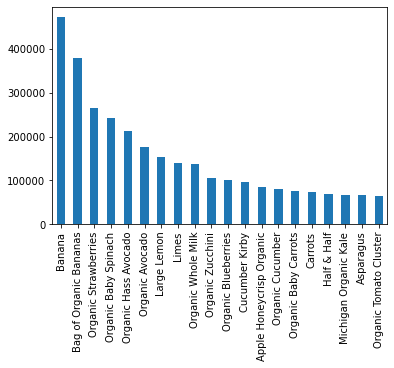

In [94]:
# Is there a difference between top selling products?
bar_graph_top_20 = df_top_20_selling_prods['product_name'].value_counts().plot.bar()

In [95]:
# Export this graph
bar_graph_top_20.figure.savefig(os.path.join(path,'Analysis','Visualizations','top_20_selling_prods.png'))

## Variable for day of the week

In [96]:
df_prods_ords_customers_2['orders_day_of_week'].value_counts().sort_index()

0    6209808
1    5665951
2    4217868
3    3844175
4    3787263
5    4209603
6    4500391
Name: orders_day_of_week, dtype: int64

In [97]:
# Creating weekday column with loc function 

df_prods_ords_customers_2.loc[df_prods_ords_customers_2['orders_day_of_week'] == 0, 'weekday'] = 'Saturday'
df_prods_ords_customers_2.loc[df_prods_ords_customers_2['orders_day_of_week'] == 1, 'weekday'] = 'Sunday'
df_prods_ords_customers_2.loc[df_prods_ords_customers_2['orders_day_of_week'] == 2, 'weekday'] = 'Monday'
df_prods_ords_customers_2.loc[df_prods_ords_customers_2['orders_day_of_week'] == 3, 'weekday'] = 'Tuesday'
df_prods_ords_customers_2.loc[df_prods_ords_customers_2['orders_day_of_week'] == 4, 'weekday'] = 'Wednesday'
df_prods_ords_customers_2.loc[df_prods_ords_customers_2['orders_day_of_week'] == 5, 'weekday'] = 'Thursday'
df_prods_ords_customers_2.loc[df_prods_ords_customers_2['orders_day_of_week'] == 6, 'weekday'] = 'Friday'

In [98]:
# Check output
df_prods_ords_customers_2['weekday'].value_counts().sort_index()

Friday       4500391
Monday       4217868
Saturday     6209808
Sunday       5665951
Thursday     4209603
Tuesday      3844175
Wednesday    3787263
Name: weekday, dtype: int64

## Create profile for time of the day

In [100]:
df_prods_ords_customers_2['order_hour_of_day'].value_counts().sort_index()

0      218951
1      115787
2       69435
3       51321
4       53284
5       88064
6      290796
7      891951
8     1719991
9     2456751
10    2764476
11    2738647
12    2620898
13    2663346
14    2691598
15    2664583
16    2537506
17    2089510
18    1637956
19    1259416
20     977049
21     796379
22     634743
23     402621
Name: order_hour_of_day, dtype: int64

Defining the times as follows:
0 - 11 = morning
12 - 17 = afternoon
18 - 23 = evening

In [101]:
result = []

for value in df_prods_ords_customers_2['order_hour_of_day']:
    if value <= 11: 
        result.append('Morning')
    elif (value > 11) and (value <= 17):
        result.append('Afternoon')
    elif (value > 17) and (value <= 24):
        result.append('Evening')
    else: 
        result.append('other')

In [102]:
result

['Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 '

In [103]:
df_prods_ords_customers_2['time_of_day'] = result

In [104]:
# Check the confirm time of the day results
df_prods_ords_customers_2['time_of_day'].value_counts()

Afternoon    15267441
Morning      11459454
Evening       5708164
Name: time_of_day, dtype: int64

In [105]:
df_customer_profile = df_prods_ords_customers_2

In [106]:
# Export customer profiles
df_customer_profile.to_pickle(os.path.join(path, 'Data','Prepared Data', 'prods_ords_customers_profiles.pkl'))

As notebook is getting large, I will end this section here and will continue with visualisations in part 2. 